# Libraries install





In [ ]:
!pip install numpy scikit-learn matplotlib seaborn pandas -q scikit-learn



**Python libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Optional: To display plots inline in Jupyter notebooks
%matplotlib inline




#Matrix

In [ ]:
class Matrix:
    def __init__(self, data):
        """Initialize the matrix with a 2D list or numpy array."""
        self.data = np.array(data)

    def __getitem__(self, index):
        """Get a row of the matrix."""
        return self.data[index]

    def shape(self):
        """Return the shape of the matrix."""
        return self.data.shape

    def weighted_euclidean_distance(self, row1_index, row2_index, weights):
        """Calculate the weighted Euclidean distance between two rows."""
        row1 = self.data[row1_index]
        row2 = self.data[row2_index]
        return np.sqrt(np.sum(weights * (row1 - row2) ** 2))

# Array_2d

In [ ]:
from sklearn.cluster import KMeans

def cluster_wines(matrix, n_clusters=3):
    if not isinstance(matrix, (np.ndarray)) or len(matrix.shape) != 2:
        raise ValueError("Input must be a 2D array.")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(matrix)
    return kmeans.labels_


#Data Loaded & Column Added

In [ ]:

csv_file_path = '/content/wines.csv'
data = pd.read_csv(csv_file_path)

# Assigning column names to the dataset (replace these with actual names if provided)
columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflav_Phenols', 'Proanthocyanins', 'Color_Intensity',
           'Hue', 'OD280_OD315', 'Proline']
data.columns = columns
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflav_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
data.shape

(177, 13)

In [ ]:
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Alcalinity_Ash,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflav_Phenols,0
Proanthocyanins,0
Color_Intensity,0


# Data Cleaning & (Check&Drop)Missing values

Checking for missing values:
Alcohol            0
Malic_Acid         0
Ash                0
Alcalinity_Ash     0
Magnesium          0
Total_Phenols      0
Flavanoids         0
Nonflav_Phenols    0
Proanthocyanins    0
Color_Intensity    0
Hue                0
OD280_OD315        0
Proline            0
dtype: int64


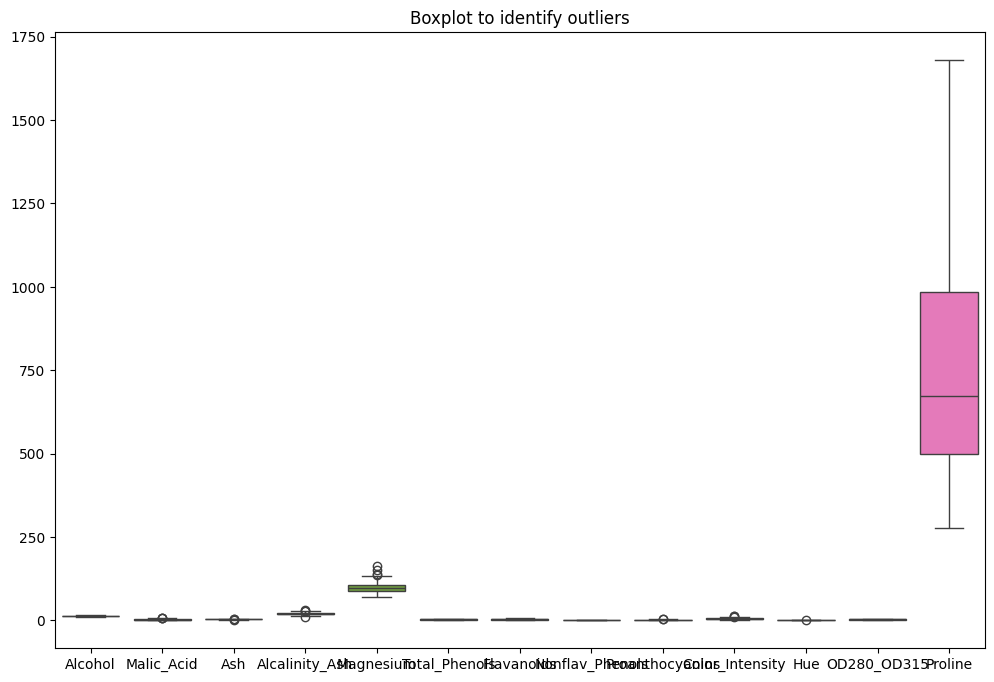

First 5 rows of the scaled data:


,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflav_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [ ]:

print("Checking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)

if missing_values.any():
    data = data.dropna()
    print("Dropped rows with missing values.")

plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot to identify outliers")
plt.show()

# ensure all features equally to clustering
scaler = StandardScaler()

#convert all features to a scaled version
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=columns)

print("First 5 rows of the scaled data:")
data_scaled_df.head()


#Exploratory Data Analysis (EDA)


Generating histograms for each feature:


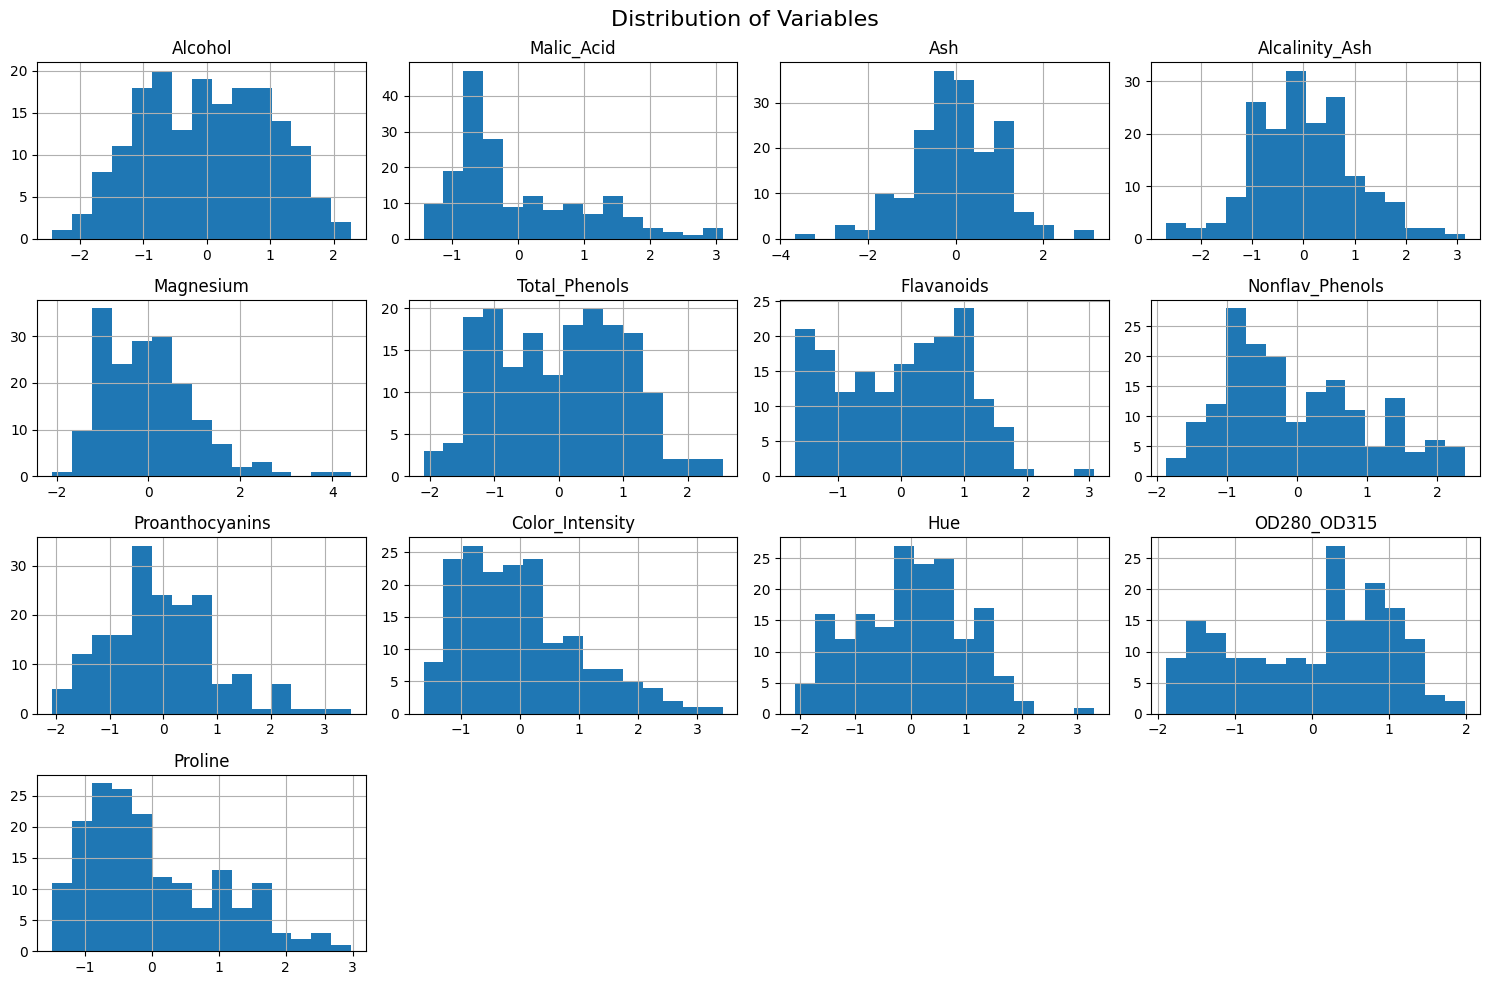

Generating pairplot for selected features:


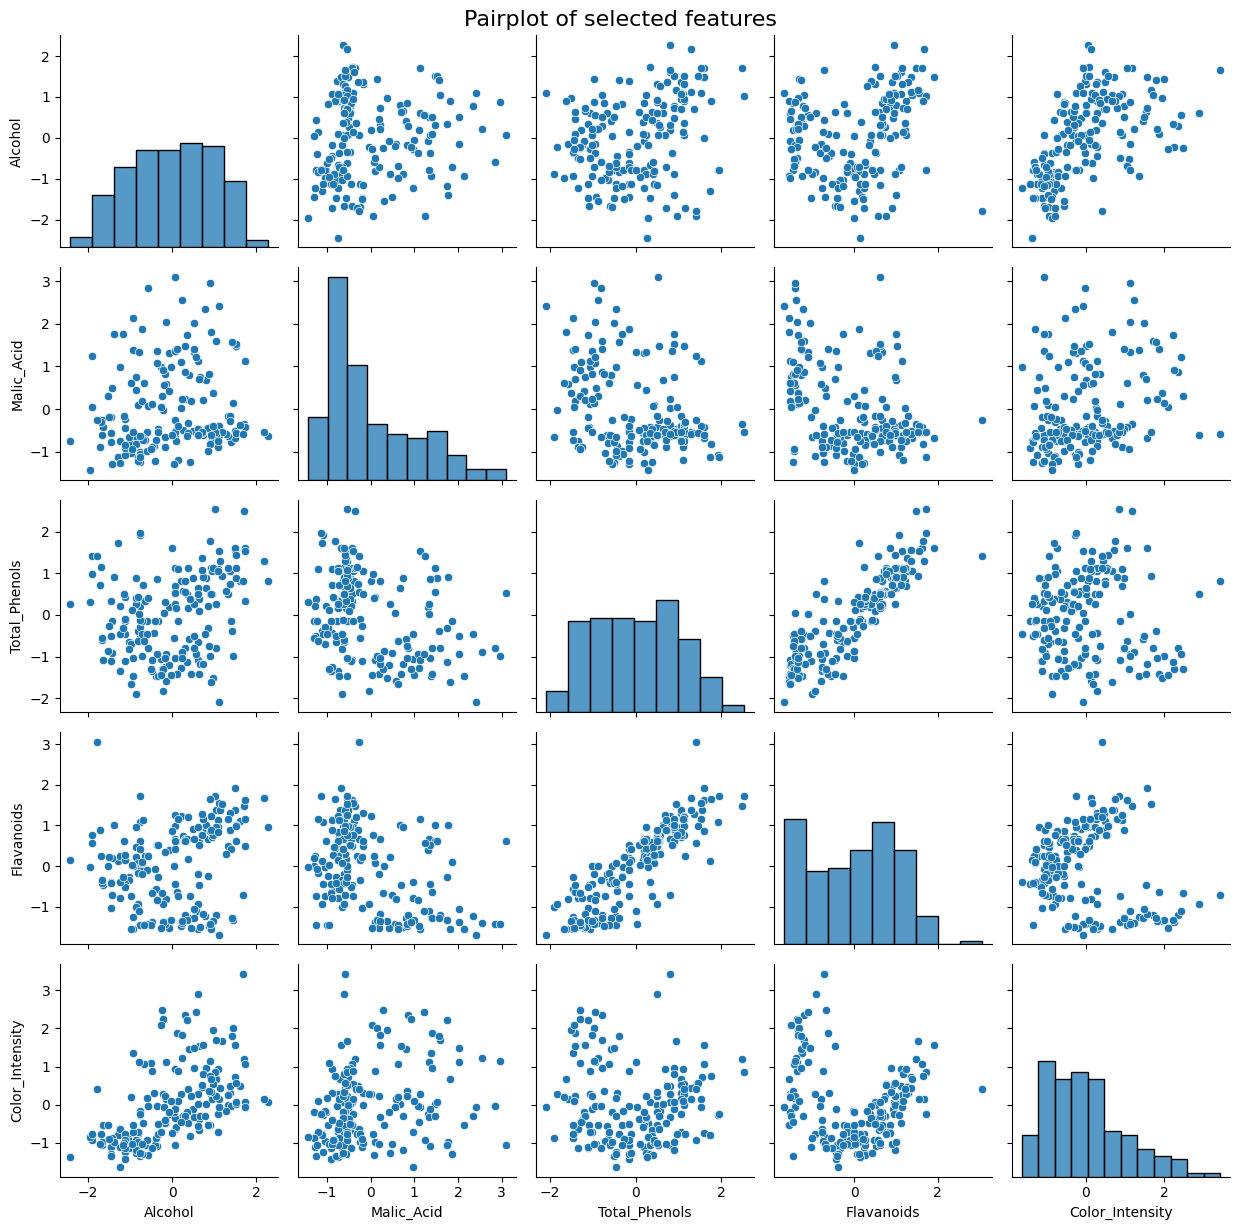

Generating a heatmap for correlation matrix:


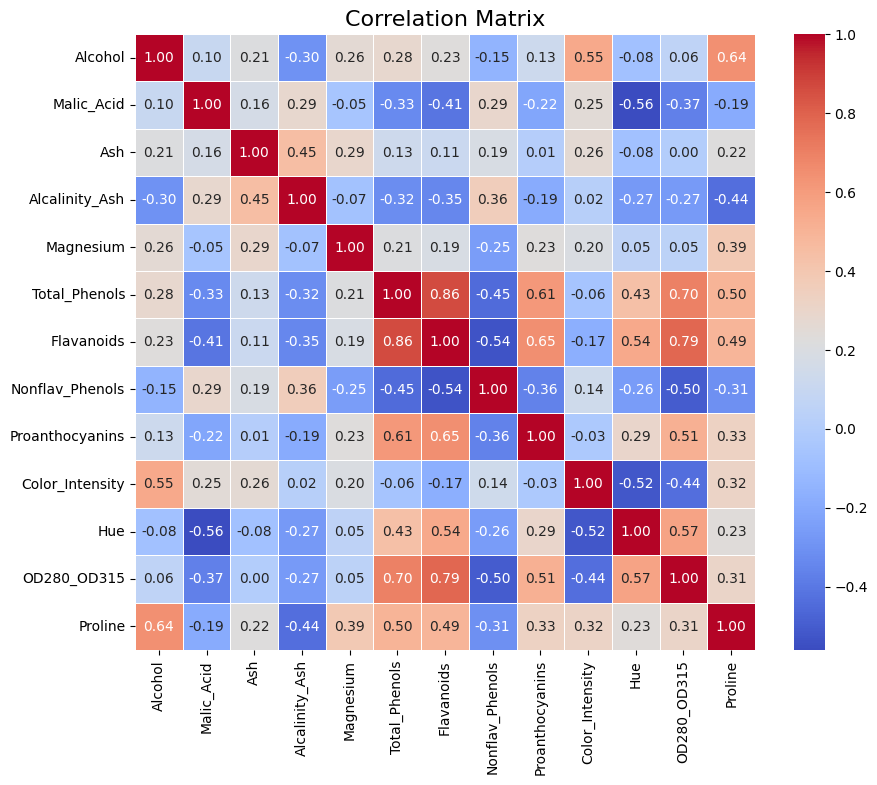

In [ ]:

# 1. Histograms
print("Generating histograms for each feature:")
data_scaled_df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Distribution of Variables", size=16)
plt.tight_layout()
plt.show()

# 2. Scatter plot matrix
print("Generating pairplot for selected features:")
sns.pairplot(data_scaled_df[['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Flavanoids', 'Color_Intensity']])
plt.suptitle("Pairplot of selected features", size=16)
plt.tight_layout()
plt.show()

# 3. Correlation matrix
print("Generating a heatmap for correlation matrix:")
plt.figure(figsize=(10, 8))
corr_matrix = data_scaled_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix", size=16)
plt.show()


#Clustering with K-Means


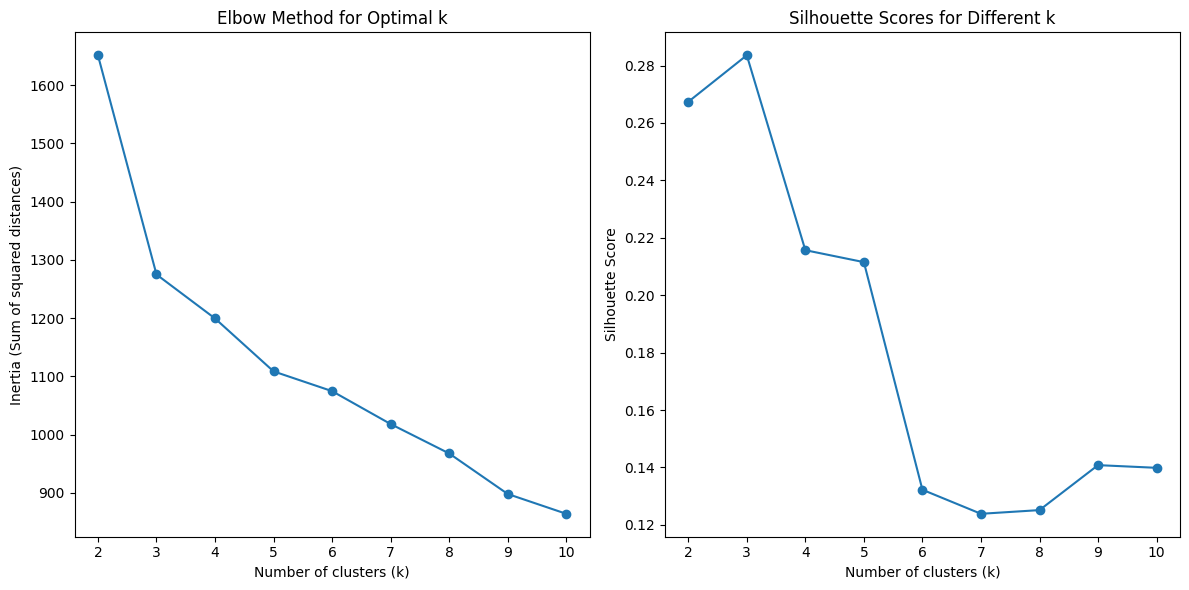

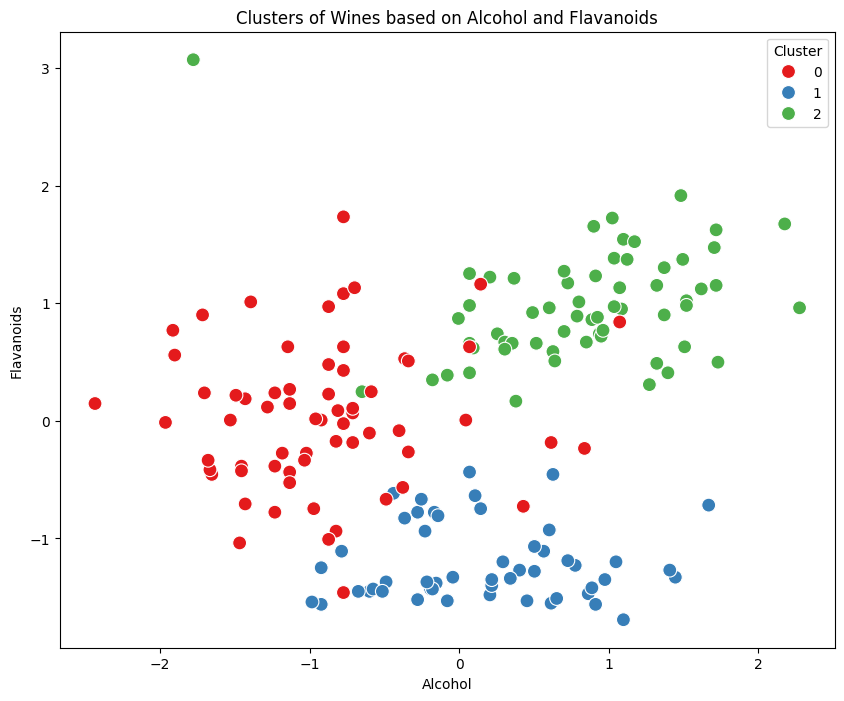

In [ ]:


# Determining
inertia = []
silhouette_scores = []
K = range(2, 11)  # Trying different values of k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest centroid
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))  # Silhouette score

# Plotting the Elbow Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.xticks(K)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)

plt.tight_layout()
plt.show()

# K-Means Clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels scaled DataFrame
data_scaled_df['Cluster'] = clusters

#Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_scaled_df, x='Alcohol', y='Flavanoids', hue='Cluster', palette='Set1', s=100)
plt.title("Clusters of Wines based on Alcohol and Flavanoids")
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.legend(title='Cluster')
plt.show()


#Calculating Weighted Euclidean Distance

In [ ]:

# Define weights for each feature
# Equal weights for all features
weights = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

# calculate weighted Euclidean distance
def weighted_euclidean(row1, row2, weights):
    return np.sqrt(np.sum(weights * (row1 - row2)**2))


# Let's calculate the distance between the first two rows in the scaled DataFrame
distance = weighted_euclidean(data_scaled_df.iloc[0, :-1], data_scaled_df.iloc[1, :-1], weights)
print(f"Weighted Euclidean distance between the first two rows: {distance}")


Weighted Euclidean distance between the first two rows: 4.1440929517852245


#Conclusion

In [ ]:

# Interpret the Meaning of the Clusters
print("Interpreting the Clusters:")
for cluster in range(optimal_k):
    cluster_data = data_scaled_df[data_scaled_df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Number of wines in this cluster: {len(cluster_data)}")
    print("Average values for features:")
    print(cluster_data.mean())

# Discussing Distance-based Clustering Performance
print("\nDiscussion on Distance-based Clustering Performance:")
# Here we can discuss the effectiveness of the K-Means algorithm and the use of weighted Euclidean distance.
# Consider factors like cluster cohesion, separation, and any observed patterns in feature relationships.

print("The K-Means algorithm effectively grouped wines with similar characteristics based on the selected features. "
      "The silhouette score indicates how well-defined the clusters are, with higher scores suggesting clearer separation. "
      "The weighted Euclidean distance can provide more nuanced similarities between wines by considering the importance of each feature.")

# additional observations & future recommendations for further analysis
print("\nFuture Recommendations:")
print("Further analysis could include exploring additional features, testing different clustering algorithms, "
      "or implementing dimensionality reduction techniques such as PCA to visualize high-dimensional data.")


Interpreting the Clusters:

Cluster 0:
Number of wines in this cluster: 65
Average values for features:
Alcohol           -0.920930
Malic_Acid        -0.396455
Ash               -0.491893
Alcalinity_Ash     0.164168
Magnesium         -0.484587
Total_Phenols     -0.071343
Flavanoids         0.026665
Nonflav_Phenols   -0.037201
Proanthocyanins    0.065280
Color_Intensity   -0.898120
Hue                0.462717
OD280_OD315        0.283158
Proline           -0.748191
Cluster            0.000000
dtype: float64

Cluster 1:
Number of wines in this cluster: 51
Average values for features:
Alcohol            0.174137
Malic_Acid         0.866702
Ash                0.187708
Alcalinity_Ash     0.518310
Magnesium         -0.065156
Total_Phenols     -0.973820
Flavanoids        -1.209664
Nonflav_Phenols    0.721192
Proanthocyanins   -0.773899
Color_Intensity    0.940477
Hue               -1.159902
OD280_OD315       -1.290878
Proline           -0.401401
Cluster            1.000000
dtype: float64

Clus